In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor

from illumine.visual import plain_tree

In [2]:
X1 = np.arange(0, 10, 0.1) + np.random.rand(100)
X2 = np.arange(10, 20, 0.1) + np.random.rand(100)

y = np.sin(X1).ravel() + np.cos(X2).ravel()
X_df = pd.DataFrame(np.array([X1, X2]).T, columns=['x1', 'x2'])

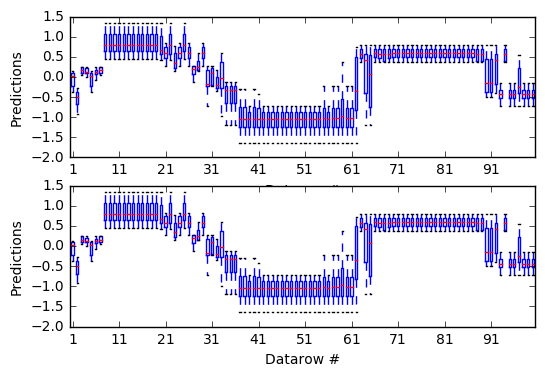

In [3]:
%matplotlib inline

sk_ensemble = GradientBoostingRegressor(n_estimators=10, )
sk_ensemble.fit(X_df, y)
plain_tree.active_leaves_boxplot(sk_ensemble, X_df, n_ax_rows=2)

plt.show()

In [4]:
from illumine.woodland import gather_leaf_values

In [5]:
feature_names = X_df.columns
leaf_values = gather_leaf_values(sk_ensemble, X_df,
                                 feature_names,
                                 gather_method='aggregate')


In [6]:
from illumine.visual import leaf_rank_barplot

x1<=6.82975 & x1>3.17547 & x2>14.07855, 42.476

x1<=2.66215 & x1<=3.17547 & x2>11.20872, 38.315

x1<=6.63368 & x1>3.17547 & x2>14.07855, 37.916

x1>3.79529 & x2<=16.88468 & x2>13.37081, 37.266

x2<=16.50644 & x2>13.37081 & x2>14.07855, 31.119

x1<=2.89761 & x1<=3.39812 & x2>11.20872, 29.985

x1>3.39812 & x2<=16.59695 & x2>14.07855, 28.332

x1<=9.7991 & x1>3.17547 & x1>6.82975, 24.721

x2<=16.88468 & x2>13.37081 & x2>14.07855, 23.904

x1<=6.04182 & x1>3.39812 & x2<=16.88468, 23.603



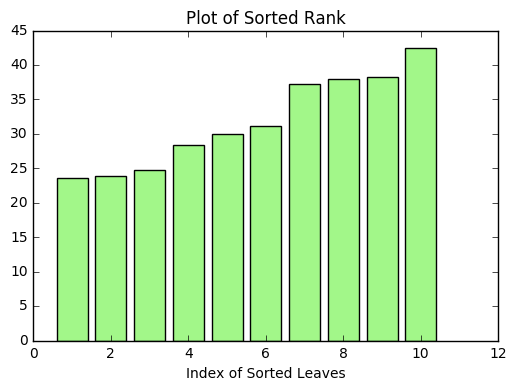

In [7]:
leaf_rank_barplot(leaf_values, n_top=10,
                  rank_method='absolute-sum', print_leaf_paths=True)
plt.show()

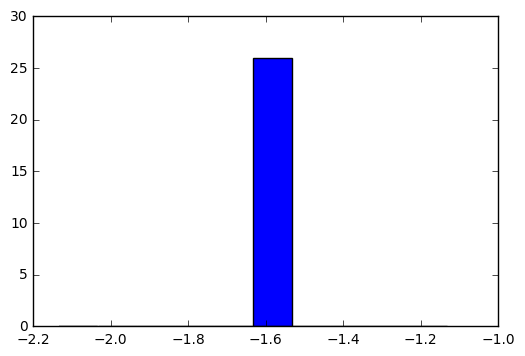

In [13]:
plt.hist(leaf_values["x1<=6.82975 & x1>3.17547 & x2>14.07855"])
plt.show()